# Part I Data Exploration on ACLED Fatalities in Nigeria

This section analyzes the dataset `Nigeria_ACLED.csv` to identify factors associated with high `ACLED Fatalities`. We will explore the influence of event types, geographic areas, and actor types on fatality counts.


In [2]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

import warnings 
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [3]:
# Load Dataset
df = pd.read_csv("Nigeria_ACLED.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACLED Actor1             1902 non-null   object 
 1   ACLED Actor1 (group)     1902 non-null   object 
 2   ACLED Actor2             1601 non-null   object 
 3   ACLED Admin1             1902 non-null   object 
 4   ACLED Admin2             1902 non-null   object 
 5   ACLED Admin3             0 non-null      float64
 6   ACLED Ally Actor1        430 non-null    object 
 7   ACLED Ally Actor2        640 non-null    object 
 8   ACLED CreatedOn          1902 non-null   object 
 9   ACLED Event ID Cnty      1902 non-null   object 
 10  ACLED Event ID No Cnty   1902 non-null   int64  
 11  ACLED Event SubType      1902 non-null   object 
 12  ACLED Event SubTypeDesc  1902 non-null   object 
 13  ACLED Event Type         1902 non-null   object 
 14  ACLED Event TypeDesc    

In [4]:
#Display the first 5 rows of the DataFrame for a quick overview
df.head()

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Admin3,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,...,ACLED SourceScale,ACLED Year,Geographic Area,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude
0,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Abia,Umuahia North,NaN,NaN,NaN,12/12/2022 3:33,NIG28349,...,National,2022,South,1,1,1,1,11,5.5263,7.4896
1,Military Forces of Nigeria (2015-),State Security Forces,Military Forces of Nigeria (2015-),Imo,Oguta,NaN,NaN,NaN,12/6/2022 15:53,NIG28909,...,National,2022,South,0,1,1,1,11,5.6333,6.8666
2,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Lagos,Amowo-Odofin,NaN,NaN,NaN,12/13/2022 9:05,NIG29012,...,National,2022,South,1,1,1,1,11,6.4437,3.2522
3,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Ogun,Shagamu,NaN,NaN,NaN,2/21/2023 9:05,NIG29996,...,National,2023,South,0,1,1,1,11,6.6955,3.5117
4,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Kebbi,Birnin-Kebbi,NaN,NaN,NaN,12/12/2022 3:33,NIG28350,...,National-Regional,2022,North West,1,1,1,1,11,12.4539,4.1975


In [5]:
#checking for missing values in each column 
df.isnull().sum()

ACLED Actor1                  0
ACLED Actor1 (group)          0
ACLED Actor2                301
ACLED Admin1                  0
ACLED Admin2                  0
ACLED Admin3               1902
ACLED Ally Actor1          1472
ACLED Ally Actor2          1262
ACLED CreatedOn               0
ACLED Event ID Cnty           0
ACLED Event ID No Cnty        0
ACLED Event SubType           0
ACLED Event SubTypeDesc       0
ACLED Event Type              0
ACLED Event TypeDesc          0
ACLED Location                0
ACLED Notes                   0
ACLED Region                  0
ACLED Source                  0
ACLED SourceScale             0
ACLED Year                    0
Geographic Area               0
ACLED Fatalities              0
ACLED Geo Precision           0
ACLED Inter1                  0
ACLED Inter2                  0
ACLED Interaction             0
ACLED Latitude                0
ACLED Longitude               0
dtype: int64

In [6]:
#Checking for unique values in dataset 
df.nunique()

ACLED Actor1                 80
ACLED Actor1 (group)         23
ACLED Actor2                 76
ACLED Admin1                 37
ACLED Admin2                436
ACLED Admin3                  0
ACLED Ally Actor1           128
ACLED Ally Actor2           193
ACLED CreatedOn              15
ACLED Event ID Cnty        1902
ACLED Event ID No Cnty     1902
ACLED Event SubType          20
ACLED Event SubTypeDesc      20
ACLED Event Type              6
ACLED Event TypeDesc          6
ACLED Location              908
ACLED Notes                1902
ACLED Region                  1
ACLED Source                372
ACLED SourceScale            13
ACLED Year                    2
Geographic Area               4
ACLED Fatalities             40
ACLED Geo Precision           3
ACLED Inter1                  8
ACLED Inter2                  8
ACLED Interaction            34
ACLED Latitude              913
ACLED Longitude             907
dtype: int64

In [7]:
# Data Cleaning
#Dropping the following columns because more than half of the data is missing
df.drop(['ACLED Admin3', 'ACLED Ally Actor1', 'ACLED Ally Actor2'], axis=1, inplace=True)

# Fill missing values in the 'ACLED Fatalities' column with 0
df['ACLED Fatalities'].fillna(0, inplace=True)

In [8]:
# Generate descriptive statistics for numerical columns
df.describe()

,ACLED Event ID No Cnty,ACLED Year,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,29050.584648,2022.356467,1.976866,1.398002,3.416404,4.326498,35.817035,8.928142,7.577692
std,815.280355,0.479081,6.945303,0.494957,1.555599,2.894265,16.570293,2.656412,2.624220
min,26494.000000,2022.000000,0.000000,1.000000,1.000000,0.000000,10.000000,4.511400,2.850000
25%,28674.250000,2022.000000,0.000000,1.000000,3.000000,1.000000,16.000000,6.450775,6.207925
50%,29157.500000,2022.000000,0.000000,1.000000,3.000000,5.000000,37.000000,8.875800,7.195800
75%,29638.750000,2023.000000,1.000000,2.000000,4.000000,7.000000,47.000000,11.486750,8.208700
max,30117.000000,2023.000000,150.000000,3.000000,8.000000,8.000000,70.000000,13.729000,14.251100


In [58]:
#checking data to identify the top values  
df.sort_values(by='ACLED Fatalities', ascending=False).head(10)

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,ACLED Event SubType,ACLED Event SubTypeDesc,...,ACLED SourceScale,ACLED Year,Geographic Area,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude
1274,Military Forces of Nigeria (2015-),State Security Forces,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,Borno,Bama,1/10/2023 9:05,NIG29289,29289,Air/drone strike,Air or drone strikes that have occurred in the...,...,New media,2022,North East,150,2,1,2,12,11.5221,13.6856
1139,Military Forces of Nigeria (2015-),State Security Forces,Zamfara Communal Militia (Nigeria),Zamfara,Bukkuyum,12/6/2022 15:53,NIG28692,28692,Armed clash,"Armed, organized groups engage in a battle, an...",...,National,2022,North West,100,2,1,4,14,12.1377,5.4665
232,Military Forces of Nigeria (2015-),State Security Forces,Sokoto Communal Militia (Nigeria),Sokoto,Rabah,1/24/2023 9:05,NIG29589,29589,Air/drone strike,Air or drone strikes that have occurred in the...,...,National,2023,North West,100,1,1,4,14,12.9266,5.6012
1140,Military Forces of Nigeria (2015-),State Security Forces,Zamfara Communal Militia (Nigeria),Zamfara,Bukkuyum,12/6/2022 15:53,NIG28693,28693,Armed clash,"Armed, organized groups engage in a battle, an...",...,National,2022,North West,100,2,1,4,14,12.1377,5.4665
234,Military Forces of Nigeria (2015-),State Security Forces,Civilians (Nigeria),Zamfara,Maru,1/17/2023 9:05,NIG29484,29484,Air/drone strike,Air or drone strikes that have occurred in the...,...,National,2022,North West,64,1,1,7,17,11.4465,6.3971
1030,Military Forces of Nigeria (2015-),State Security Forces,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,Niger,Shiroro,1/24/2023 9:05,NIG29588,29588,Air/drone strike,Air or drone strikes that have occurred in the...,...,National,2023,Centre,42,1,1,2,12,10.4674,6.9228
1269,Military Forces of Nigeria (2015-),State Security Forces,Islamic State (West Africa) and/or Boko Haram ...,Borno,Kukawa,2/14/2023 9:05,NIG29891,29891,Shelling/artillery/missile attack,Long-range artillery or missile system used in...,...,National,2023,North East,42,2,1,2,12,12.9186,13.6283
1006,Unidentified Armed Group (Nigeria),Armed Bandits,Civilians (Nigeria),Nassarawa,Doma,1/31/2023 9:05,NIG29728,29728,Remote explosive/landmine/IED,Remote- or victim-activated devices detonated ...,...,National-Regional,2023,Centre,40,1,3,7,37,7.9308,8.3050
187,Yansakai Militia,Communal militias,Katsina Communal Militia (Nigeria),Katsina,Kankara,2/14/2023 9:05,NIG29920,29920,Armed clash,"Armed, organized groups engage in a battle, an...",...,National-International,2023,North West,36,1,3,4,34,11.8693,7.4756
188,Yansakai Militia,Communal militias,Katsina Communal Militia (Nigeria),Katsina,Kankara,2/14/2023 9:05,NIG29919,29919,Armed clash,"Armed, organized groups engage in a battle, an...",...,National-International,2023,North West,36,1,3,4,34,11.8693,7.4756


In [59]:
# correlation between ACLED Fatalities and other factors 
columns = ['ACLED Fatalities', 'ACLED Geo Precision', 'ACLED Inter1', 'ACLED Inter2', 'ACLED Interaction']
df[columns].corr()

,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Interaction
ACLED Fatalities,1.000000,0.099544,-0.211440,-0.040552,-0.200564
ACLED Geo Precision,0.099544,1.000000,-0.218775,0.114510,-0.159480
ACLED Inter1,-0.211440,-0.218775,1.000000,-0.238767,0.827339
ACLED Inter2,-0.040552,0.114510,-0.238767,1.000000,0.129732
ACLED Interaction,-0.200564,-0.159480,0.827339,0.129732,1.000000


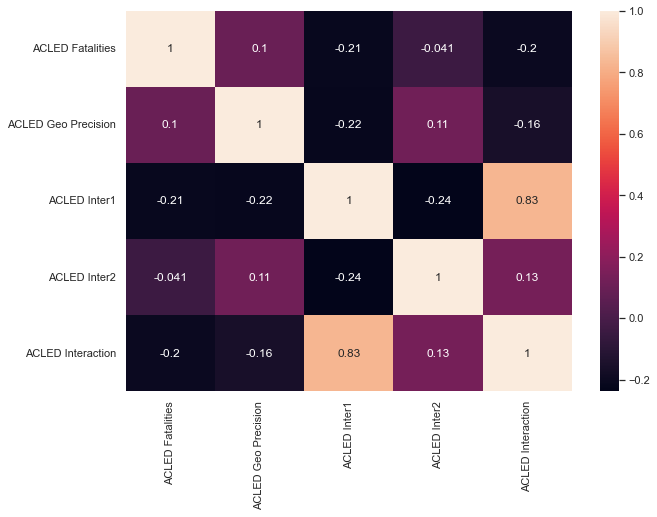

In [60]:
sns.heatmap(df[columns].corr(), annot=True)
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

Based on the correlation matrix, a strong positive correlation is evident between 'ACLED Inter1' and 'ACLED Interactions.' However, no significant correlations were observed between these variables and 'ACLED Fatalities'.

In [94]:
# Group the data by 'ACLED Location' and calculate the mean of specified numeric columns
grouped_df = df.groupby('ACLED Location').agg({
    'ACLED Fatalities': 'mean',
})

# Sort the grouped DataFrame by 'ACLED Fatalities' in ascending order
sorted_df = grouped_df.sort_values(by='ACLED Fatalities', ascending=False)
sorted_df.head()

,ACLED Fatalities
ACLED Location,
Rarah,50.0
Kurebe,42.0
Kukawa,42.0
Rukubi,40.0
Yargoje,36.0


The analysis reveals that Rarah is the location with the highest average number of fatalities per incident, with a mean of 50 fatalities. This is followed by Kukawa and Kurebe, both with an average of 42 fatalities. These findings indicate that these locations have experienced particularly severe and intense conflict events

## Factor 1: Event Type vs. Fatalities
Analyzing the relationship between event types and average fatalities.

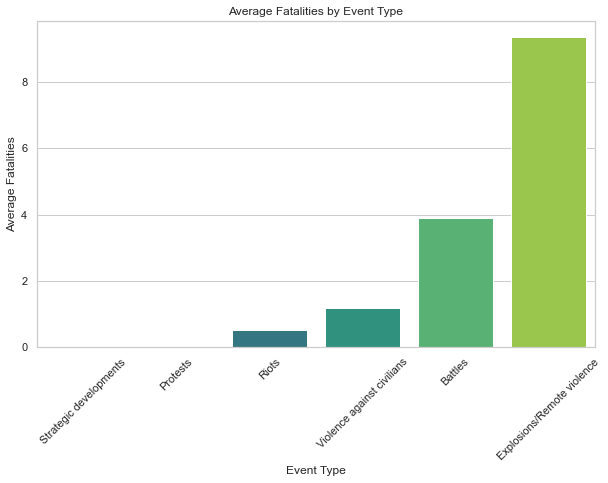

In [5]:
# Grouping data by 'ACLED Event Type' and calculating the average fatalities/event type
event_fatalities = df.groupby('ACLED Event Type')['ACLED Fatalities'].mean().sort_values()

# Plotting event Type vs. Fatalities
plt.figure(figsize=(10, 6))
sns.barplot(x=event_fatalities.index, y=event_fatalities.values, palette='viridis')
plt.title('Average Fatalities by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Fatalities')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the average fatalities associated with different event types, showing that **Explosions/Remote Violence** events have the highest average fatalities, followed by **Battles** and **Violence against Civilians**. Events like **Protests**, **Riots**, and **Strategic Developments** have much lower or negligible fatality rates. This suggests that violent events, particularly those involving explosions, are significantly deadlier, highlighting the increased risks associated with certain types of conflicts or attacks compared to less confrontational events.

## Factor 2: Geographic Area (ACLED Admin1) vs. Fatalities
Mapping fatalities by geographic area to visualize high-fatality regions.

In [6]:
#Created a shape file from a json file 
geojson_file_path = 'ng.json'  
gdf = gpd.read_file(geojson_file_path)

shapefile_path = 'nig.shp'  # Desired output shapefile name
gdf.to_file(shapefile_path, driver='ESRI Shapefile')

In [74]:
# Grouping data by 'ACLED Admin1' and calculating total fatalities
location_fatalities = df.groupby('ACLED Admin1')['ACLED Fatalities'].sum().sort_values(ascending=False)

# Loading shapefile for mapping
nigeria_map = gpd.read_file(r"C:\Users\User\Downloads\nji-task\nig.shp")

nigeria_map = nigeria_map.merge(location_fatalities, left_on='name', right_index=True, how='left').fillna(0)


<Figure size 1080x720 with 0 Axes>

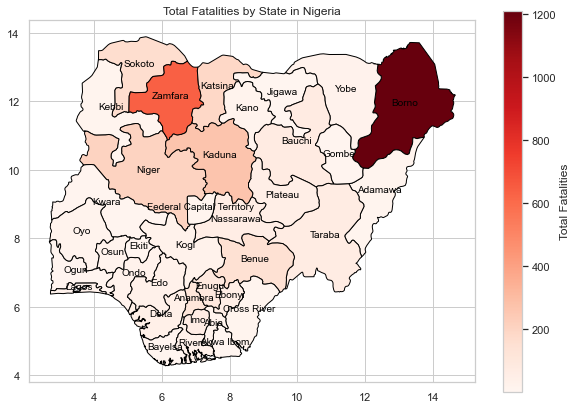

In [75]:
# Plot map of fatalities by state
plt.figure(figsize=(15,10))
nigeria_map.plot(column='ACLED Fatalities', cmap='Reds', legend=True, edgecolor="black", legend_kwds={'label': "Total Fatalities"})
plt.title('Total Fatalities by State in Nigeria')
for x, y, label in zip(nigeria_map.centroid.x, nigeria_map.centroid.y, nigeria_map['name']):
    plt.text(x, y, label, fontsize=10, ha='center', color='black')
plt.show()

The map illustrates total fatalities by state in Nigeria, with a color gradient indicating severity. **Borno** state, highlighted in dark red, has the highest fatalities, followed by **Zamfara** and **Katsina**, shown in lighter shades of red. Other states exhibit progressively lighter colors, indicating fewer fatalities. This spatial distribution suggests that northern regions, particularly Borno, experience the highest fatality rates, likely due to ongoing conflicts or insurgencies in those areas, while southern and central states generally see lower fatality counts. This map could be valuable for prioritizing security resources and intervention efforts in Nigeria.

In [84]:
# Group the data by 'ACLED Location' and calculate the mean of specified numeric columns
grouped_df = df.groupby('Geographic Area').agg({
    'ACLED Fatalities': 'mean',
})

# Sort the grouped DataFrame by 'ACLED Fatalities' in ascending order
sorted_df = grouped_df.sort_values(by='ACLED Fatalities', ascending=False)
sorted_df.head()

,ACLED Fatalities
Geographic Area,
North East,4.747440
North West,2.559524
Centre,1.598160
South,0.716303


These findings suggest that the North East and North West regions are experiencing more intense and violent conflict compared to the Centre and South. It's important to note that while these are average figures, individual incidents within each region can vary significantly in terms of severity.

## Factor 3: Actors vs. Fatalities
Identifying actors most associated with high-fatality events.

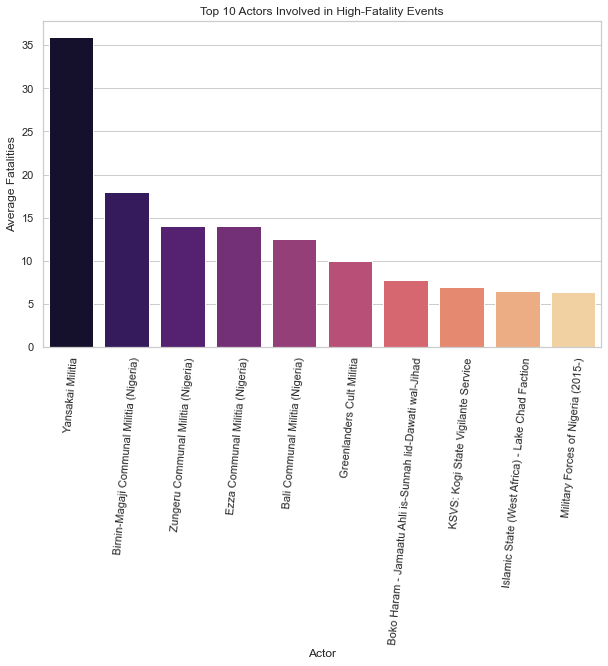

In [70]:
# Grouping by Actor and calculating average fatalities
actor_fatalities = df.groupby('ACLED Actor1')['ACLED Fatalities'].mean().sort_values(ascending=False).head(10)

# Plot Actor vs. Fatalities
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_fatalities.index, y=actor_fatalities.values, palette='magma')
plt.title('Top 10 Actors Involved in High-Fatality Events')
plt.xlabel('Actor')
plt.ylabel('Average Fatalities')
plt.xticks(rotation=85)
plt.show()

The provided chart indicates that the Yansakai Militia is responsible for the highest average number of fatalities per incident, with a mean of 36 casualties. This is followed closely by the Birnin-Magaji Communal Militia, Zengeru and Ezza Communal Militia, both with average fatalities of 18, 14 and 14, respectively. These findings underscore the significant impact of these specific groups on the region's conflict dynamics and the resulting human toll.

#  Part II Machine Learning 

 In this section, we will apply machine learning techniques to the provided violence dataset. The goal is to predict the escalation of violence, as indicated by the 'Class' variable.


1.Given that the 'Class' variable likely represents a categorical variable indicating different levels of violence escalation, a suitable evaluation metric would be the F1-score. This metric provides a balance between precision and recall, both of which are crucial in this context. High precision ensures that positive predictions are accurate, minimizing false positives, while high recall ensures that all positive instances are correctly identified, minimizing false negatives. By considering both precision and recall, the F1-score offers a comprehensive assessment of the model's performance in classifying different levels of violence escalation.

In [87]:
# Load dataset
df1 = pd.read_csv("violence.csv")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   F1      284807 non-null  float64
 1   F2      284807 non-null  float64
 2   F3      284807 non-null  float64
 3   F4      284807 non-null  float64
 4   F5      284807 non-null  float64
 5   F6      284807 non-null  float64
 6   F7      284807 non-null  float64
 7   F8      284807 non-null  float64
 8   F9      284807 non-null  float64
 9   F10     284807 non-null  float64
 10  F11     284807 non-null  float64
 11  F12     284807 non-null  float64
 12  F13     284807 non-null  float64
 13  F14     284807 non-null  float64
 14  F15     284807 non-null  float64
 15  F16     284807 non-null  float64
 16  F17     284807 non-null  float64
 17  F18     284807 non-null  float64
 18  F19     284807 non-null  float64
 19  F20     284807 non-null  float64
 20  F21     284807 non-null  float64
 21  F22     28

In [89]:
# Separate features and target variable
X = df1.drop(columns=['Class'])
y = df1['Class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')


Logistic Regression F1 Score: 0.9989755039586719


In [91]:
# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prediction and evaluation 
y_pred_rf = rf.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')


Random Forest F1 Score: 0.999554764115789


In [92]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Based on the classification reports, the Random Forest model performs better than Logistic Regression on this dataset, especially for the minority class (label "1").

Random Forest achieves a higher recall (0.78 vs. 0.56) and F1-score (0.86 vs. 0.67) for class "1", which indicates it is better at correctly identifying positive cases.
The macro average F1-score for Random Forest is 0.93, compared to 0.84 for Logistic Regression. This difference shows that Random Forest balances performance across both classes more effectively, particularly with respect to class "1".
Both models achieve perfect accuracy due to the large number of negative samples (class "0"), but Random Forest’s superior recall and F1-score for class "1" suggest it generalizes better in this imbalanced dataset.
In summary, Random Forest outperforms Logistic Regression in this scenario, mainly due to its higher recall and F1-score on the minority class.

## Improving Performance

In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, len(y) / sum(y == 1)]  # Adjust for class imbalance
}

# Perform RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
xgb_random.fit(X_train, y_train)

# Best model from randomized search
best_xgb = xgb_random.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
best_xgb_f1 = f1_score(y_test, y_pred_best_xgb, average='weighted')

print("Improved XGBoost F1 Score:", best_xgb_f1)
print("Best Parameters for XGBoost:", xgb_random.best_params_)


Improved XGBoost F1 Score: 0.9995520711965837
Best Parameters for XGBoost: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}


In this code , I used XGBoost to improve classification performance on an imbalanced dataset by tunning hyperparameters with RandomizedSearchCV

Model Intialization: I initialized an XGBClassifier model, specifying parameters like eval_metric='logloss' to monitor model loss during training, and scale_pos_weight to address imbalance.

HyperparameterTuning: I created a parameter grid for key hyperparameters(e.g n_estimators, max_depth,learning_rate,subsample) to optimize model performance. scale_pos_weight was adjusted to emphasize the minority class, which helps in imbalanced classification.

Randomized search for best parameters: Using RandomizedSearchCV, I conducted a cross-validated search over the parameter grid with f1_weighted as the scoring metric, which is suited for imbalance data. This method randomly samples from the grid, reducing computational cost while still exploring multile parameter combinations.

Model Evaluation: After finding the best parameters, I used the optimized model to predict on the test set and calculated the F1 score to evaluate its performance.

This approach helps find an optimal XGBoost model  while efficiently addressing imbalances and tuning parameters to improve F1 score.